In [4]:
# Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

# Load the dataset:
wine_df = pd.read_csv("winequality-red.csv", sep=";")

# Preprocessing data
bins = (2, 6.5, 8)
group_names = ["bad", "good"]
wine_df["quality"] = pd.cut(wine_df["quality"], bins = bins, labels = group_names)
wine_df["quality"].unique()
wine_df["quality"].value_counts()

# Separate dataset as response variable and feature variable:
input_ds = wine_df.drop(columns = "quality")
output_ds = wine_df["quality"]

# Train and test splitting our data:
input_train, input_test, output_train, output_test = train_test_split(input_ds, output_ds, test_size = 0.2, random_state = 42)

# Applying a standard scalar to the data, prior to modeling.
# Provides optimized results:
sc = StandardScaler()
input_train = sc.fit_transform(input_train)
input_test = sc.transform(input_test)


In [19]:
# Explore the dataset:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


In [14]:
# Explore the dataset:
wine_df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,bad
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,bad
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,bad
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,bad
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,bad


<AxesSubplot:xlabel='quality', ylabel='count'>

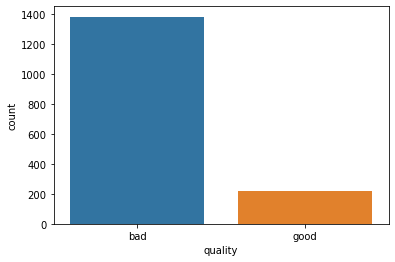

In [2]:
# Visualize the wine quality distribution among the 1599 samples:
sns.countplot(x = wine_df["quality"])

In [13]:
# Wine quality distribution:
wine_df["quality"].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [13]:
# Prints first 11 rows of my input train dataset:
print(input_train[:11, :])

[[ 0.21833164  0.88971201  0.19209222  0.30972563 -0.04964208  0.69100692
   1.04293362  1.84669643  1.09349989  0.45822284  1.12317723]
 [-1.29016623 -1.78878251  0.65275338 -0.80507963 -0.45521361  2.38847304
   3.59387025 -3.00449133 -0.40043872 -0.40119696  1.40827174]
 [ 1.49475291 -0.78434707  1.01104539 -0.52637831  0.59927236 -0.95796016
  -0.99174203  0.76865471 -0.07566946  0.51551749 -0.58738978]
 [ 0.27635078  0.86181102 -0.06383064 -0.66572897 -0.00908493  0.01202048
  -0.71842739  0.08948842  0.05423824 -1.08873281 -0.96751578]
 [ 0.04427419  2.81487994 -0.62686095  2.39998549 -0.31326357 -0.47296984
   0.2229897   1.1998714   0.37900751 -0.9741435  -0.49235828]
 [-0.07176411 -0.78434707  1.11341454 -0.17800167  0.21397941  3.01896045
   2.62208486  0.60694845  0.44396136  1.89058918 -0.58738978]
 [-1.17412793  0.10848444 -0.62686095 -0.52637831 -0.23214927  0.98200112
  -0.35400787 -1.95879086  0.05423824  0.91658007  1.12317723]
 [-0.1878024  -0.17052541  0.60156881  0.

# Random Forest Classifier

In [6]:
# Create the first model.
# Has 200 decision trees.
# Model is trained using standardized datasets:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(input_train, output_train)
predictions_rfc = rfc.predict(input_test)

In [8]:
# Print the first 20 elements of the predictions 1D array:
print(predictions_rfc[0:20])

['bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad'
 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad']


In [9]:
 # Print the first 20 elements of the 'input_test' 2D array:
print(input_test[:20, :])

[[-3.61859850e-01  1.64286407e-01 -9.85152962e-01 -3.86510130e-02
   5.18158057e-01 -1.81975648e-01 -1.99566462e-02  1.75731759e-01
  -4.65392578e-01 -1.34389336e-04 -7.77452782e-01]
 [-3.03840702e-01 -1.70525408e-01 -5.24491803e-01 -6.65728970e-01
  -1.30756387e-01  4.97010797e-01  1.68066777e+00 -4.17191190e-01
   5.08915214e-01 -1.03143815e+00 -8.72484283e-01]
 [ 1.37871461e+00  7.78108067e-01 -2.68568937e-01  1.00699644e-01
   3.76208022e-01  1.09018543e-01 -3.84376165e-01  1.95450060e+00
  -2.05577167e-01  1.83329452e+00 -4.92358280e-01]
 [ 1.02293339e-01 -3.93733284e-01  1.92092221e-01 -2.12839335e-01
  -2.11870693e-01  1.56398950e+00  3.44462872e-01  6.60850535e-01
   1.19192097e-01 -6.87670232e-01 -5.87389780e-01]
 [-9.42051337e-01 -3.93733284e-01 -1.66199791e-01 -5.96053642e-01
  -2.32149269e-01  2.06016607e-01 -3.84376165e-01 -1.06401623e+00
   5.08915214e-01 -3.43902311e-01  1.72862226e-01]
 [-6.51955593e-01 -6.72743130e-01  1.40907648e-01 -3.17352327e-01
  -1.10477811e-01  

In [11]:
# Test the accuracy of the model.
# Use 'classification_report()' function:
print(classification_report(output_test, predictions_rfc))

              precision    recall  f1-score   support

         bad       0.92      0.97      0.95       273
        good       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



In [12]:
# Test the accuracy of the model.
# Use 'confusion_matrix()' function:
print(confusion_matrix(output_test, predictions_rfc))

[[265   8]
 [ 22  25]]


In [29]:
# Calculate the accuracy score:
from sklearn.metrics import accuracy_score

score = accuracy_score(output_test, predictions_rfc)
print("The score is: ", score)

The score is:  0.90625


In [34]:
# Predict the quality of wine with these attributes:
new_input_test = [[10.5, 0.95, 0.55, 1.8, 0.072, 11.0, 15.0, 0.9963, 3.23, 0.65, 9.2]]
new_input_test = sc.transform(new_input_test)
predictions_rfc = rfc.predict(new_input_test)
print("The wine quality is: ", predictions_rfc)

The wine quality is:  ['bad']


C:\Users\Miketobbz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Support Vector Classifier(SVC)

In [15]:
# Create the second model.
# model is trained using standardized datasets:
clf = svm.SVC()
clf.fit(input_train, output_train)
predictions_clf = clf.predict(input_test)

In [16]:
# Print the first 20 elements of the predictions 1D array:
print(predictions_clf[:20])

['bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad'
 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad']


In [17]:
# Test the accuracy of the model.
# Use 'classification_report()' function:
print(classification_report(output_test, predictions_clf))

              precision    recall  f1-score   support

         bad       0.88      0.98      0.93       273
        good       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [18]:
# Test the accuracy of the model.
# Use 'confusion_matrix()' function:
print(confusion_matrix(output_test, predictions_clf))

[[268   5]
 [ 35  12]]


In [28]:
# Calculate the accuracy score:
from sklearn.metrics import accuracy_score

score = accuracy_score(output_test, predictions_clf)
print("The score is: ", score)

The score is:  0.875


In [36]:
# Predict the quality of wine with these attributes:
new_input_test = [[10.5, 0.95, 0.55, 1.8, 0.072, 11.0, 15.0, 0.9963, 3.23, 0.65, 9.2]]
new_input_test = sc.transform(new_input_test)
predictions_clf = clf.predict(new_input_test)
print("The wine quality is: ", predictions_clf)

The wine quality is:  ['bad']


C:\Users\Miketobbz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Neural Network/Multi-layer Perceptron Classifier(MLP)

In [22]:
# Create the third model-a neural network.
# The neural network is trained using standardized datasets.
# It has 3 hidden layers with 11 nodes, each:
mlpc = MLPClassifier(hidden_layer_sizes = (11, 11, 11), max_iter = 900)
mlpc.fit(input_train, output_train)
predictions_mlpc = mlpc.predict(input_test)

In [24]:
# Print the first 20 elements of the predictions 1D array:
print(predictions_mlpc[:20])

['bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad'
 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'bad']


In [25]:
# Test the accuracy of the neural network.
# Use 'classification_report()' function:
print(classification_report(output_test, predictions_mlpc))

              precision    recall  f1-score   support

         bad       0.94      0.92      0.93       273
        good       0.59      0.64      0.61        47

    accuracy                           0.88       320
   macro avg       0.76      0.78      0.77       320
weighted avg       0.89      0.88      0.88       320



In [26]:
# Test the accuracy of the neural network.
# Use 'confusion_matrix()' function:
print(confusion_matrix(output_test, predictions_mlpc))

[[252  21]
 [ 17  30]]


In [27]:
# Calculate the accuracy score:
from sklearn.metrics import accuracy_score

score = accuracy_score(output_test, predictions_mlpc)
print("The score is: ", score)

The score is:  0.88125


In [37]:
# Predict the quality of wine with these attributes:
new_input_test = [[10.5, 0.95, 0.55, 1.8, 0.072, 11.0, 15.0, 0.9963, 3.23, 0.65, 9.2]]
new_input_test = sc.transform(new_input_test)
predictions_mlpc = mlpc.predict(new_input_test)
print("The wine quality is: ", predictions_mlpc)


The wine quality is:  ['bad']


C:\Users\Miketobbz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
